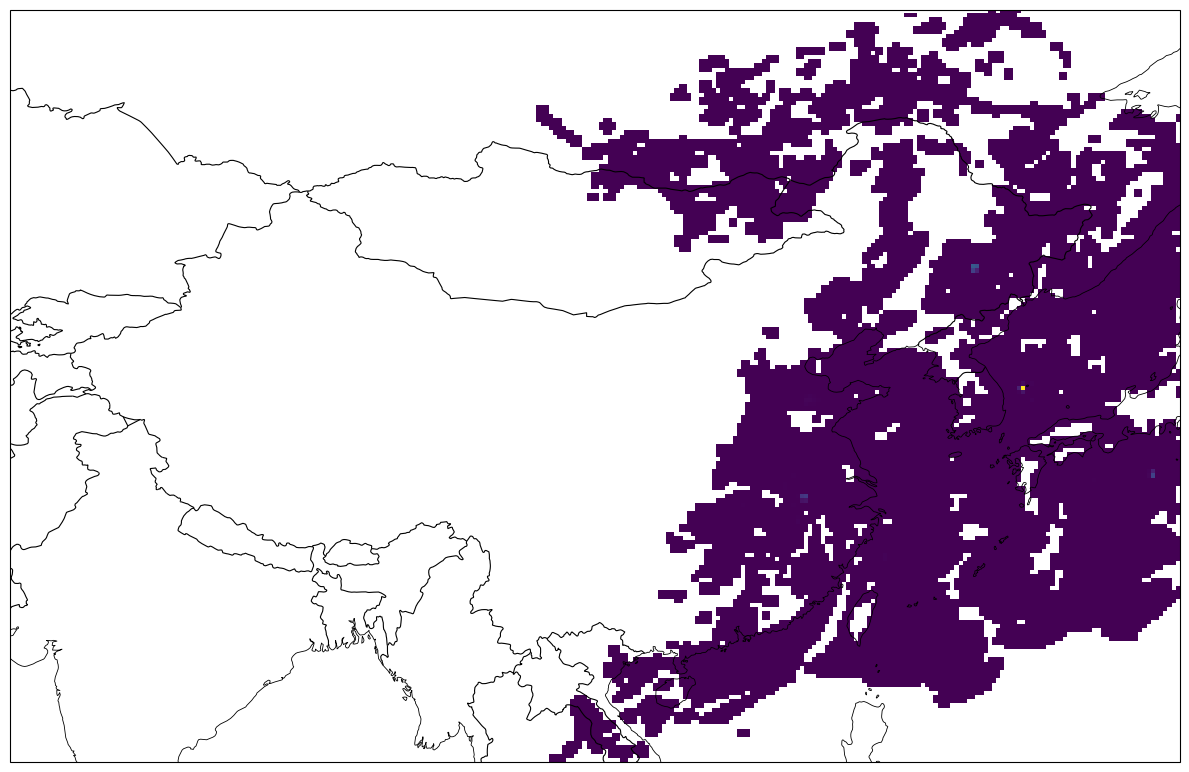

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.animation import FuncAnimation
from matplotlib.colors import Normalize
import matplotlib.cm as cm


def read_data(filename, sizes):
    Nx, Ny,Nz, Nt = sizes[0], sizes[1], sizes[2], sizes[3]
    data_n = Nx * Ny * Nz * Nt
    
    with open(filename, 'rb') as file:
        data = np.fromfile(file, dtype=np.float32, count=data_n)
    
    return data.reshape((Nx, Ny, Nz, Nt), order='F')
lon_min, lon_max = 70, 140
lat_min, lat_max = 15, 60
lon_dim, lat_dim, time_dim = 280, 180, 240
file = 'obs.bin'
sizes = [280,180,10,240]
conc = read_data(file,sizes)
conc_show = conc[:,:,0,:].copy()
conc_show[conc_show == 0] =np.nan

fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
# ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())
# # 设置地图范围
# ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())

# # 添加地理特征
# ax.add_feature(cfeature.LAND.with_scale('50m'), edgecolor='k', facecolor='none')
# ax.add_feature(cfeature.OCEAN.with_scale('50m'))
# ax.add_feature(cfeature.COASTLINE.with_scale('50m'), linewidth=0.5)
# ax.add_feature(cfeature.BORDERS.with_scale('50m'), linestyle=':', linewidth=0.5)

# # 添加中国国境线（更精确）
# china_border = cfeature.NaturalEarthFeature(
#     category='cultural',
#     name='admin_0_boundary_lines_land',
#     scale='50m',
#     facecolor='none',
#     edgecolor='red',  # 红色国境线
#     linewidth=1.5
# )
# ax.add_feature(china_border)
cmap = cm.viridis  # 选择颜色映射
# img = ax.pcolormesh(lon_grid, lat_grid, data[:, :, 0], 
#                    cmap=cmap, norm=norm, 
#                    transform=ccrs.PlateCarree())
img = ax.imshow(conc_show[:,:,200].T,cmap=cmap, origin='lower', extent=[lon_min, lon_max, lat_min, lat_max])
ax.add_feature(cfeature.BORDERS, linewidth=0.8, edgecolor='black')
ax.add_feature(cfeature.COASTLINE, linewidth=0.6, edgecolor='black')
# # 更新函数
# def update(frame):
#     """更新动画的每一帧"""
#     img.set_array(conc_show[:, :, frame].ravel())
#     ax.set_title(f'Concentration Map - Time Step: {frame+1}/{time_dim}')
#     return img,

# # 创建动画
# ani = FuncAnimation(fig, update, frames=time_dim, 
#                    interval=100, blit=True)  # interval=100ms (0.1s)

plt.tight_layout()
plt.show()

